# Multiple and Logistic Regression in R

# DATACAMP

In [1]:
options(warn=-1)

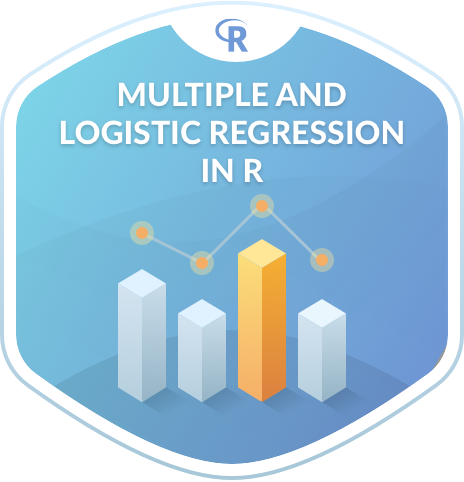

In [2]:
library("IRdisplay")
display_png(file="mlr.png")

# Course Description
In this course you'll take your skills with simple linear regression to the next level. By learning multiple and logistic regression techniques you will gain the skills to model and predict both numeric and categorical outcomes using multiple input variables. You'll also learn how to fit, visualize, and interpret these models. Then you'll apply your skills to learn about Italian restaurants in New York City!

# 1. Parallel Slopes

In this chapter you'll learn about the class of linear models called "parallel slopes models." These include one numeric and one categorical explanatory variable.

## Fitting a parallel slopes model

We use the lm() function to fit linear models to data. 
In this case, we want to understand how the price of MarioKart games sold 
at auction varies as a function of not only the number of wheels included in the package, 
but also whether the item is new or used. 
Obviously, it is expected that you might have to pay a premium to buy these new. 
But how much is that premium? Can we estimate its value after controlling for the number of wheels?

We will fit a parallel slopes model using lm(). In addition to the data argument, 
lm() needs to know which variables you want to include in your regression model, 
and how you want to include them. It accomplishes this using a formula argument. 
A simple linear regression formula looks like y ~ x, where y is the name of the response variable, 
and x is the name of the explanatory variable. 
Here, we will simply extend this formula to include multiple explanatory variables. 
A parallel slopes model has the form y ~ x + z, where z is a categorical explanatory variable, 
and x is a numerical explanatory variable.

The output from lm() is a model object, which when printed, will show the fitted coefficients.

### Instructions

- The dataset mario_kart is already loaded for you. Explore the data using glimpse() or str().
- Use lm() to fit a parallel slopes model for total price as a function of 
the number of wheels and the condition of the item. 
- Use the argument data to specify the dataset you're using.

In [4]:
# install.packages("openintro")

In [6]:
library(openintro)
library(dplyr)

In [7]:
data(mariokart)
mario_kart <- mariokart

In [8]:
names(mario_kart) <- c( "ID", "duration", "nBids", "cond", "startPr","shipPr","totalPr","shipSp","sellerRate","stockPhoto",
                         "wheels","title")

In [9]:
mario_kart <- mario_kart[mario_kart$totalPr<100,]
dim(mario_kart)

[1] 141  12

In [10]:
# Explore the data
glimpse(mario_kart)

# fit parallel slopes
lm(totalPr ~ wheels + cond, data = mario_kart)

Rows: 141
Columns: 12
$ ID         <dbl> 150377422259, 260483376854, 320432342985, 280405224677, ...
$ duration   <int> 3, 7, 3, 3, 1, 3, 1, 1, 3, 7, 1, 1, 1, 1, 7, 7, 3, 3, 1,...
$ nBids      <int> 20, 13, 16, 18, 20, 19, 13, 15, 29, 8, 15, 15, 13, 16, 6...
$ cond       <fct> new, used, new, new, new, new, used, new, used, used, ne...
$ startPr    <dbl> 0.99, 0.99, 0.99, 0.99, 0.01, 0.99, 0.01, 1.00, 0.99, 19...
$ shipPr     <dbl> 4.00, 3.99, 3.50, 0.00, 0.00, 4.00, 0.00, 2.99, 4.00, 4....
$ totalPr    <dbl> 51.55, 37.04, 45.50, 44.00, 71.00, 45.00, 37.02, 53.99, ...
$ shipSp     <fct> standard, firstClass, firstClass, standard, media, stand...
$ sellerRate <int> 1580, 365, 998, 7, 820, 270144, 7284, 4858, 27, 201, 485...
$ stockPhoto <fct> yes, yes, no, yes, yes, yes, yes, yes, yes, no, yes, yes...
$ wheels     <int> 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2,...
$ title      <fct> "~~ Wii MARIO KART &amp; WHEEL ~ NINTENDO Wii ~ BRAND NE...



Call:
lm(formula = totalPr ~ wheels + cond, data = mario_kart)

Coefficients:
(Intercept)       wheels     condused  
     42.370        7.233       -5.585  


## Using geom_line() and augment()
Parallel slopes models are so-named because we can visualize these models in the data space as not one line, but two parallel lines. To do this, we'll draw two things:

a scatterplot showing the data, with color separating the points into groups
a line for each value of the categorical variable
Our plotting strategy is to compute the fitted values, plot these, and connect the points to form a line. The augment() function from the broom package provides an easy way to add the fitted values to our data frame, and the geom_line() function can then use that data frame to plot the points and connect them.

Note that this approach has the added benefit of automatically coloring the lines appropriately to match the data.

You already know how to use ggplot() and geom_point() to make the scatterplot. The only twist is that now you'll pass your augment()-ed model as the data argument in your ggplot() call. When you add your geom_line(), instead of letting the y aesthetic inherit its values from the ggplot() call, you can set it to the .fitted column of the augment()-ed model. This has the advantage of automatically coloring the lines for you.

### Instructions
- The parallel slopes model mod relating total price to the number of wheels and condition is already in your workspace.
augment() the model mod and explore the returned data frame using glimpse(). Notice the new variables that have been created.
- Draw the scatterplot and save it as data_space by passing the augment()-ed model to ggplot() and using geom_point().
- Use geom_line() once to add two parallel lines corresponding to our model.

In [12]:
#install.packages('broom')

In [13]:
library(broom)
library(ggplot2)

In [14]:
mod <- lm(totalPr ~ wheels + cond, data = mario_kart)

Rows: 141
Columns: 9
$ totalPr    <dbl> 51.55, 37.04, 45.50, 44.00, 71.00, 45.00, 37.02, 53.99, ...
$ wheels     <int> 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2,...
$ cond       <fct> new, used, new, new, new, new, used, new, used, used, ne...
$ .fitted    <dbl> 49.60260, 44.01777, 49.60260, 49.60260, 56.83544, 42.369...
$ .resid     <dbl> 1.9473995, -6.9777674, -4.1026005, -5.6026005, 14.164559...
$ .std.resid <dbl> 0.40270893, -1.43671086, -0.84838977, -1.15857953, 2.926...
$ .hat       <dbl> 0.02103158, 0.01250410, 0.02103158, 0.02103158, 0.019156...
$ .sigma     <dbl> 4.902339, 4.868399, 4.892414, 4.881308, 4.750591, 4.8998...
$ .cooksd    <dbl> 1.161354e-03, 8.712334e-03, 5.154337e-03, 9.612441e-03, ...


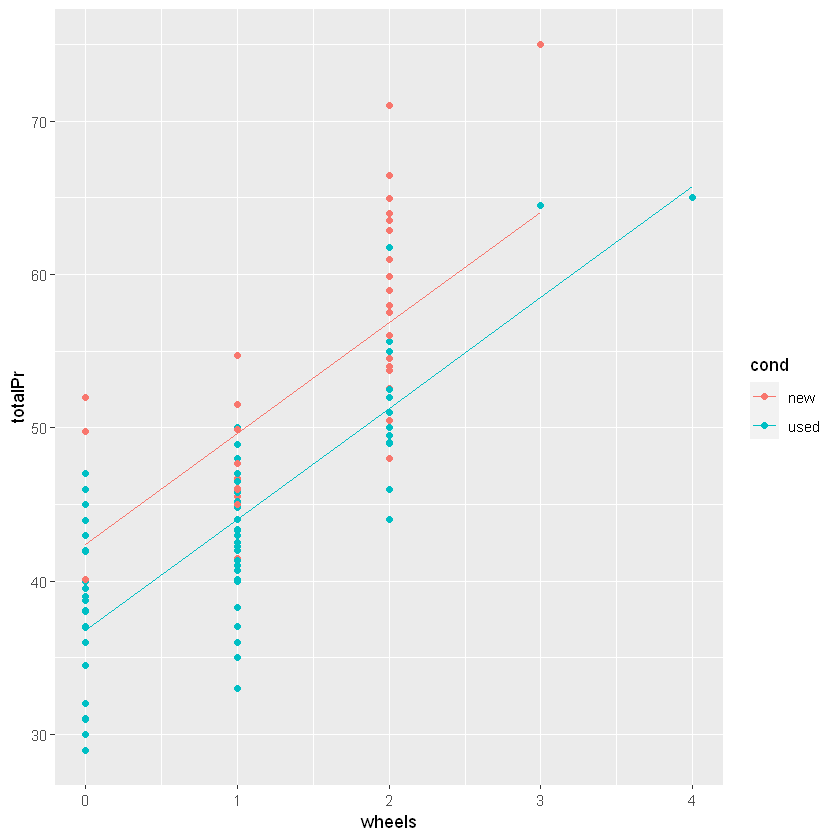

In [15]:
# Augment the model
augmented_mod <- augment(mod)
glimpse(augmented_mod)

# scatterplot, with color
data_space <- ggplot(augmented_mod, aes(x = wheels, y = totalPr, color = cond)) + 
  geom_point()
  
# single call to geom_line()
data_space + 
  geom_line(aes(y = .fitted))

In [16]:
data(babies)
babies <- babies
head(babies)

case,bwt,gestation,parity,age,height,weight,smoke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,284,0,27,62,100,0
2,113,282,0,33,64,135,0
3,128,279,0,28,64,115,1
4,123,NA,0,36,69,190,0
5,108,282,0,23,67,125,1
6,136,286,0,25,62,93,0


## Syntax from math
The babies data set contains observations about the birthweight and other characteristics of children born in the San Francisco Bay area from 1960--1967.

We would like to build a model for birthweight as a function of the mother's age and whether this child was her first (parity == 0). Use the mathematical specification below to code the model in R.

$$ birthweight = \beta_0 + \beta_1 \cdot age + \beta_2 \cdot parity + \epsilon $$

The birthweight variable is recorded in the column bwt.

- Use lm() to build the parallel slopes model specified above. 
- It's not necessary to use factor() in this case as the variable parity is coded using binary numeric values.

In [17]:
# build model
lm(bwt ~ age + parity, data = babies)


Call:
lm(formula = bwt ~ age + parity, data = babies)

Coefficients:
(Intercept)          age       parity  
  118.27782      0.06315     -1.65248  


## Syntax from plot
This time, we'd like to build a model for birthweight as a function of 
the length of gestation and the mother's smoking status. Use the plot to inform your model specification.

Instructions

- Use lm() to build a parallel slopes model implied by the plot. It's not necessary to use factor() in this case either.

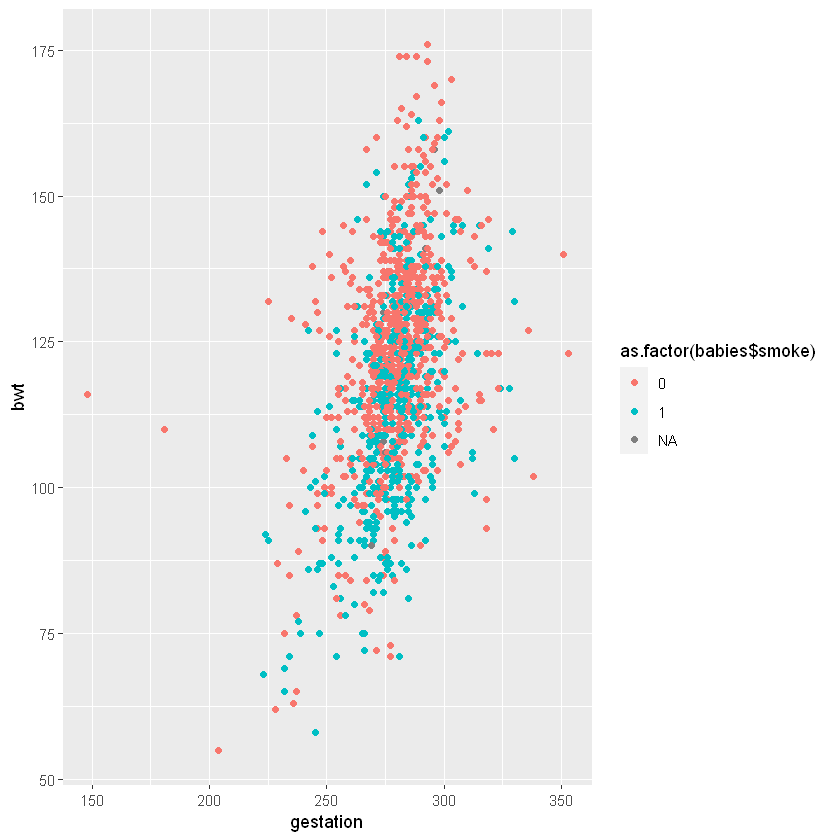

In [18]:
ggplot(babies, aes(x = gestation, y = bwt, color = as.factor(babies$smoke))) + 
  geom_point()

In [19]:
# build model
lm(bwt ~ gestation + smoke, data = babies)


Call:
lm(formula = bwt ~ gestation + smoke, data = babies)

Coefficients:
(Intercept)    gestation        smoke  
    -0.9317       0.4429      -8.0883  


# 2. Evaluating and extending parallel slopes model

This chapter covers model evaluation. By looking at different properties of the model, including the adjusted R-squared, you'll learn to compare models so that you can select the best one. You'll also learn about interaction terms in linear models.

## R-squared vs. adjusted R-squared
Two common measures of how well a model fits to data are \(R^2\) (the coefficient of determination) and the adjusted \(R^2\). The former measures the percentage of the variability in the response variable that is explained by the model. To compute this, we define $$ R^2 = 1 - \frac{SSE}{SST} \,, $$ where \(SSE\) and \(SST\) are the sum of the squared residuals, and the total sum of the squares, respectively. One issue with this measure is that the \(SSE\) can only decrease as new variable are added to the model, while the \(SST\) depends only on the response variable and therefore is not affected by changes to the model. This means that you can increase \(R^2\) by adding any additional variable to your model—even random noise.

The adjusted \(R^2\) includes a term that penalizes a model for each additional explanatory variable (where \(p\) is the number of explanatory variables). $$ R^2_{adj} = 1 - \frac{SSE}{SST} \cdot \frac{n-1}{n-p-1} \,, $$

- Use summary() to compute $R^2$ and adjusted $R^2$ on the model object called mod.

- Use mutate() and rnorm() to add a new variable called noise to the mario_kart data set that consists of random noise. Save the new dataframe as mario_kart_noisy.

- Use lm() to fit a model that includes wheels, cond, and the random noise term.
- Use summary() to compute $\(R^2\)$ and adjusted $\(R^2\)$ on the new model object. Did the value of $\(R^2\)$ increase? What about adjusted $\(R^2\)$?

In [20]:
# R^2 and adjusted R^2
summary(mod)

# add random noise
mario_kart_noisy <- mario_kart %>%
  mutate(noise = rnorm(nrow(mario_kart)))
  
# compute new model
mod2 <- lm(totalPr ~ wheels + cond + noise, data = mario_kart_noisy)

# new R^2 and adjusted R^2
summary(mod2)


Call:
lm(formula = totalPr ~ wheels + cond, data = mario_kart)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0078  -3.0754  -0.8254   2.9822  14.1646 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.3698     1.0651  39.780  < 2e-16 ***
wheels        7.2328     0.5419  13.347  < 2e-16 ***
condused     -5.5848     0.9245  -6.041 1.35e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.887 on 138 degrees of freedom
Multiple R-squared:  0.7165,	Adjusted R-squared:  0.7124 
F-statistic: 174.4 on 2 and 138 DF,  p-value: < 2.2e-16



Call:
lm(formula = totalPr ~ wheels + cond + noise, data = mario_kart_noisy)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0251  -3.1806  -0.8279   2.9243  14.4388 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.2840     1.0787  39.198  < 2e-16 ***
wheels        7.2528     0.5444  13.322  < 2e-16 ***
condused     -5.5074     0.9371  -5.877 3.02e-08 ***
noise         0.2260     0.4040   0.559    0.577    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.9 on 137 degrees of freedom
Multiple R-squared:  0.7172,	Adjusted R-squared:  0.711 
F-statistic: 115.8 on 3 and 137 DF,  p-value: < 2.2e-16


## Prediction
 Once we have fit a regression model, we can use it to make predictions for unseen observations or retrieve the fitted values. Here, we explore two methods for doing the latter.

A traditional way to return the fitted values (i.e. the \($\hat{y}$\)'s) is to run the predict() function on the model object. This will return a vector of the fitted values. Note that predict() will take an optional newdata argument that will allow you to make predictions for observations that are not in the original data.

A newer alternative is the augment() function from the broom package, which returns a data.frame with the response varible (\($y$\)), the relevant explanatory variables (the \($x$\)'s), the fitted value (\($\hat{y}$\)) and some information about the residuals (\(e\)). augment() will also take a newdata argument that allows you to make predictions.

### Instructions
- The fitted model mod is already in your environment.
- Compute the fitted values of the model as a vector using predict().
- Compute the fitted values of the model as one column in a data.frame using augment().

In [21]:
# return a vector
predict(mod)

# return a data frame
augment(mod)

1        2        3        4        5        6        7        8 
49.60260 44.01777 49.60260 49.60260 56.83544 42.36976 36.78493 56.83544 
       9       10       11       12       13       14       15       16 
44.01777 44.01777 56.83544 56.83544 56.83544 56.83544 44.01777 36.78493 
      17       18       19       20       21       22       23       24 
49.60260 49.60260 56.83544 36.78493 56.83544 56.83544 56.83544 44.01777 
      25       26       27       28       29       30       31       32 
56.83544 36.78493 36.78493 36.78493 49.60260 36.78493 36.78493 44.01777 
      33       34       35       36       37       38       39       40 
51.25061 44.01777 44.01777 36.78493 44.01777 56.83544 56.83544 49.60260 
      41       42       43       44       45       46       47       48 
44.01777 51.25061 56.83544 56.83544 44.01777 56.83544 36.78493 36.78493 
      49       50       51       52       53       54       55       56 
44.01777 56.83544 36.78493 44.01777 42.36976 36.78493 36.78493 44.01777 
      57       58       59       60       61       62       63       64 
44.01777 36.78493 36.78493 56.83544 36.78493 56.83544 36.78493 51.25061 
      65       66       67       68       69       70       71       72 
56.83544 44.01777 58.48345 51.25061 49.60260 44.01777 49.60260 56.83544 
      73       74       75       76       77       78       79       80 
56.83544 51.25061 44.01777 36.78493 36.78493 36.78493 44.01777 56.83544 
      81       82       83       84       85       86       87       88 
44.01777 65.71629 44.01777 56.83544 36.78493 49.60260 49.60260 36.78493 
      89       90       91       92       93       94       95       96 
44.01777 36.78493 51.25061 44.01777 36.78493 51.25061 42.36976 56.83544 
      97       98       99      100      101      102      103      104 
51.25061 44.01777 51.25061 56.83544 56.83544 56.83544 36.78493 49.60260 
     105      106      107      108      109      110      111      112 
51.25061 44.01777 56.83544 49.60260 36.78493 44.01777 51.25061 56.83544 
     113      114      115      116      117      118      119      120 
64.06828 44.01777 49.60260 44.01777 49.60260 51.25061 42.36976 44.01777 
     121      122      123      124      125      126      127      128 
56.83544 44.01777 49.60260 44.01777 51.25061 56.83544 56.83544 49.60260 
     129      130      131      132      133      134      135      136 
56.83544 36.78493 44.01777 44.01777 36.78493 56.83544 36.78493 44.01777 
     137      138      139      140      141 
36.78493 51.25061 49.60260 36.78493 56.83544

totalPr,wheels,cond,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51.55,1,new,49.60260,1.9473995,0.40270893,0.02103158,4.902339,1.161354e-03
37.04,1,used,44.01777,-6.9777674,-1.43671086,0.01250410,4.868399,8.712334e-03
45.50,1,new,49.60260,-4.1026005,-0.84838977,0.02103158,4.892414,5.154337e-03
44.00,1,new,49.60260,-5.6026005,-1.15857953,0.02103158,4.881308,9.612441e-03
71.00,2,new,56.83544,14.1645592,2.92633276,0.01915635,4.750591,5.574926e-02
45.00,0,new,42.36976,2.6302399,0.55141918,0.04749321,4.899816,5.053659e-03
37.02,0,used,36.78493,0.2350730,0.04860821,0.02089945,4.905181,1.681147e-05
53.99,2,new,56.83544,-2.8454408,-0.58785499,0.01915635,4.899077,2.249739e-03
47.00,1,used,44.01777,2.9822326,0.61403681,0.01250410,4.898517,1.591419e-03


## Fitting a model with interaction

Including an interaction term in a model is easy—we just have to tell lm() 
that we want to include that new variable. An expression of the form

    lm(y ~ x + z + x:z, data = mydata)
will do the trick. The use of the colon (:) here means that the interaction between x and z will be a third term in the model.

### Instructions

- The data frame mario_kart is already loaded in your workspace.
- Use lm() to fit a model for the price of a MarioKart as a function of its condition and the duration of the auction, with interaction.

In [22]:
# include interaction
lm(totalPr ~ duration + cond + cond:duration, data = mario_kart)


Call:
lm(formula = totalPr ~ duration + cond + cond:duration, data = mario_kart)

Coefficients:
      (Intercept)           duration           condused  duration:condused  
           58.268             -1.966            -17.122              2.325  


### Visualizing interaction models
Interaction allows the slope of the regression line in each group to vary. In this case, this means that the relationship between the final price and the length of the auction is moderated by the condition of each item.

Interaction models are easy to visualize in the data space with ggplot2 because they have the same coefficients as if the models were fit independently to each group defined by the level of the categorical variable. In this case, new and used MarioKarts each get their own regression line. To see this, we can set an aesthetic (e.g. color) to the categorical variable, and then add a geom_smooth() layer to overlay the regression line for each color.

### Instructions

- The dataset mario_kart is already loaded in your workspace.
- Use the color aesthetic and the geom_smooth() function to plot the interaction model between duration and condition in the data space. Make sure you set the method and se arguments of geom_smooth().

`geom_smooth()` using formula 'y ~ x'



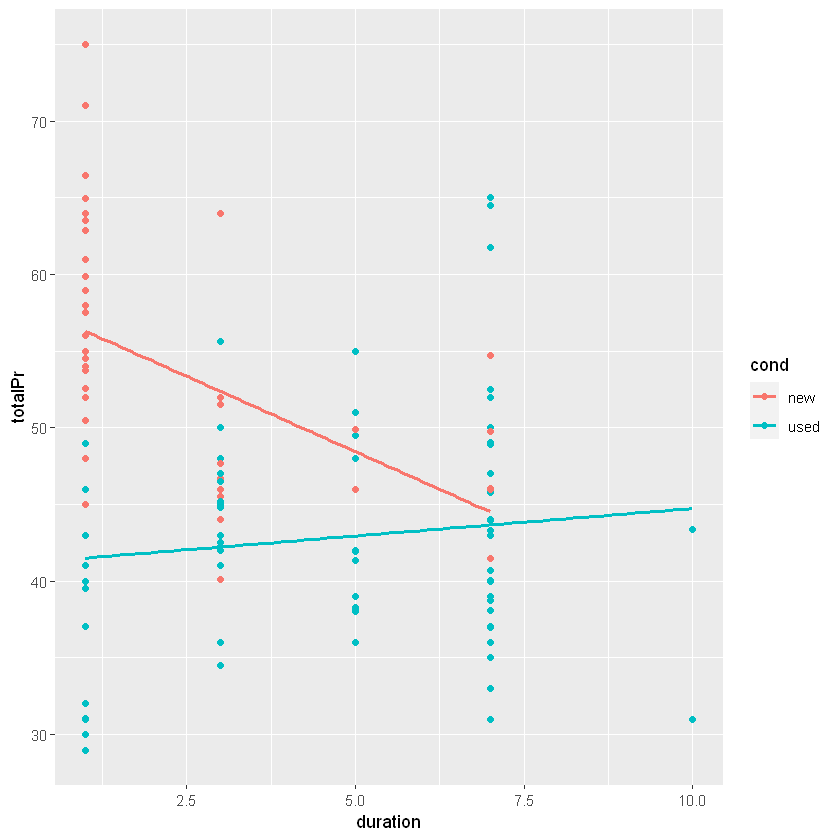

In [23]:
# interaction plot
ggplot(mario_kart, aes(y = totalPr, x = duration, color = cond)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)

## Simpson's paradox in action
A mild version of Simpson's paradox can be observed in the MarioKart auction data. Consider the relationship between the final auction price and the length of the auction. It seems reasonable to assume that longer auctions would result in higher prices, since—other things being equal—a longer auction gives more bidders more time to see the auction and bid on the item.

However, a simple linear regression model reveals the opposite: longer auctions are associated with lower final prices. The problem is that all other things are not equal. In this case, the new MarioKarts—which people pay a premium for—were mostly sold in one-day auctions, while a plurality of the used MarioKarts were sold in the standard seven-day auctions.

Our simple linear regression model is misleading, in that it suggests a negative relationship between final auction price and duration. However, for the used MarioKarts, the relationship is positive.

### Instructions

- The object slr is already defined for you.
- Fit a simple linear regression model for final auction price (totalPr) as a function of duration (duration).
- Use aes() to add a color aesthetic that's mapped to the condition variable to the slr object, which is the plot shown at right.

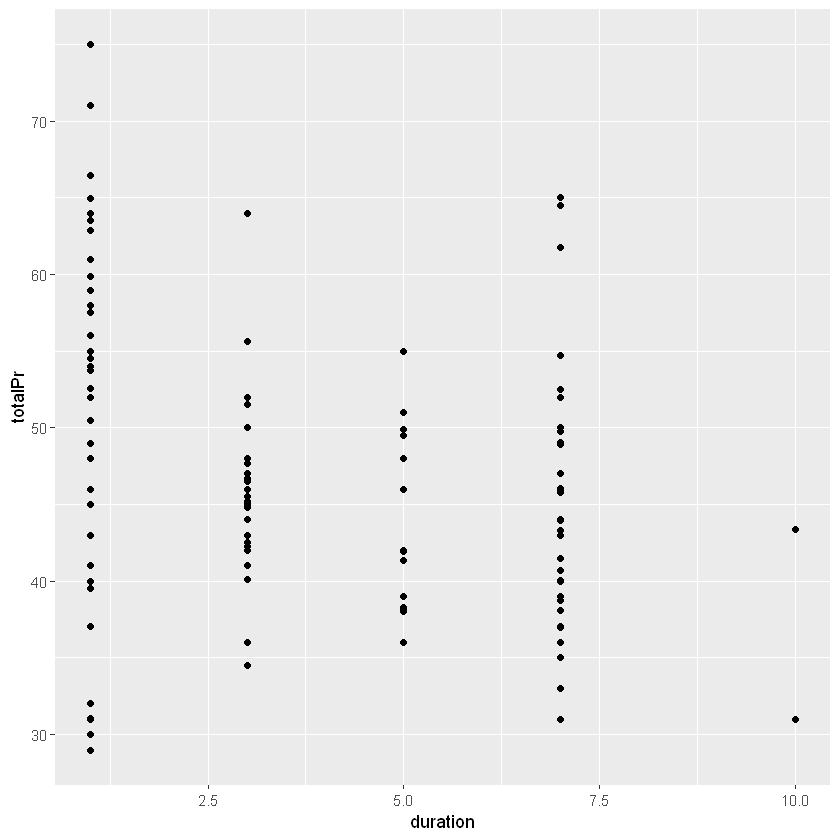

In [24]:
ggplot(mario_kart, aes(x = duration, y = totalPr)) + 
  geom_point()


Call:
lm(formula = totalPr ~ duration, data = mario_kart)

Coefficients:
(Intercept)     duration  
     52.374       -1.317  


`geom_smooth()` using formula 'y ~ x'



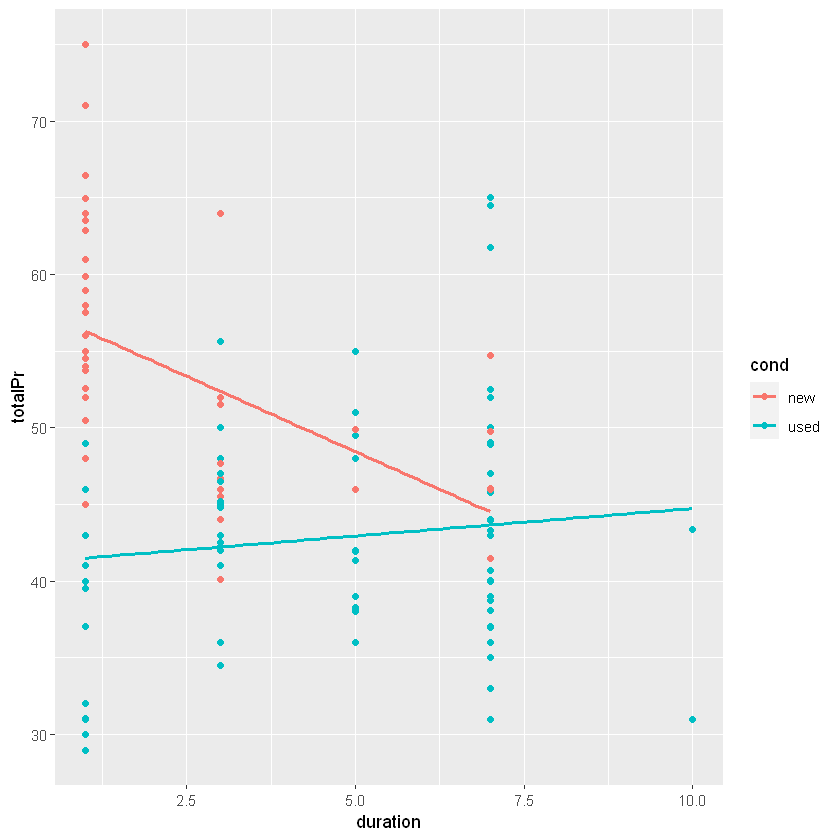

In [25]:
slr <- ggplot(mario_kart, aes(y = totalPr, x = duration)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)

# model with one slope
lm(totalPr ~ duration, data = mario_kart)

# plot with two slopes
slr + aes(color = cond)

# 3. Multiple Regression

This chapter will show you how to add two, three, and even more numeric explanatory variables to a linear model.

## Fitting a MLR model
In terms of the R code, fitting a multiple linear regression model is easy: simply add variables to the model formula you specify in the lm() command.

In a parallel slopes model, we had two explanatory variables: one was numeric and one was categorical. Here, we will allow both explanatory variables to be numeric.

### Instructions
- The dataset mario_kart is already loaded in your workspace.
- Fit a multiple linear regression model for total price as a function of the duration of the auction and the starting price.

In [26]:
# Fit the model using duration and startPr
lm(totalPr ~ duration + startPr, data = mario_kart)


Call:
lm(formula = totalPr ~ duration + startPr, data = mario_kart)

Coefficients:
(Intercept)     duration      startPr  
     51.030       -1.508        0.233  


## Tiling the plane
One method for visualizing a multiple linear regression model is to create a heatmap of the fitted values in the plane defined by the two explanatory variables. This heatmap will illustrate how the model output changes over different combinations of the explanatory variables.

This is a multistep process:

First, create a grid of the possible pairs of values of the explanatory variables. The grid should be over the actual range of the data present in each variable. We've done this for you and stored the result as a data frame called grid.
Use augment() with the newdata argument to find the y^'s corresponding to the values in grid.
Add these to the data_space plot by using the fill aesthetic and geom_tile().

### Instructions
- The model object mod is already in your workspace.
- Use augment() to create a data.frame that contains the values the model outputs for each row of grid.
- Use geom_tile to illustrate these predicted values over the data_space plot. Use the fill aesthetic and set alpha = 0.5.

In [27]:
# install.packages('xlsx')

In [28]:
# library(xlsx)
#grid <- read.xlsx(file ="df.xlsx", sheetIndex = 1, header=TRUE)

In [29]:
# mod <- lm(formula = totalPr ~ duration + startPr, data = mario_kart)

In [30]:
# data_space <- ggplot(mario_kart, aes(x = duration, y = startPr, color = totalPr)) + 
#   geom_point()  

In [31]:
#  # add predictions to grid
#  price_hats <- augment(mod, newdata = grid)
#  
#  # tile the plane
#  data_space + 
#    geom_tile(data = price_hats, aes(fill = .fitted), alpha = 0.5)

## Models in 3D

An alternative way to visualize a multiple regression model with two numeric explanatory variables is as a plane in three dimensions. This is possible in R using the plotly package.

We have created three objects that you will need:

- x: a vector of unique values of duration
- y: a vector of unique values of startPr
- plane: a matrix of the fitted values across all combinations of x and y

Much like ggplot(), the plot_ly() function will allow you to create a plot object with variables mapped to x, y, and z aesthetics. The add_markers() function is similar to geom_point() in that it allows you to add points to your 3D plot.

Note that plot_ly uses the pipe (%>%) operator to chain commands together.

### Instructions

- Run the plot_ly command to draw 3D scatterplot for totalPr as a function of duration and startPr 
    by mapping the z variable to the response and the x and y variables to the explanatory variables. 
    Duration should be on the x-axis and starting price should be on the y-axis.
- Use add_surface() to draw a plane through the cloud of points by setting z = ~plane.


In [32]:
#  # draw the 3D scatterplot
#  p <- plot_ly(data = mario_kart, z = ~totalPr, x = ~duration, y = ~startPr, opacity = 0.6) %>%
#    add_markers() 
#    
#  # draw the plane
#  p %>%
#    add_surface(x = ~x, y = ~y, z = ~plane, showscale = FALSE)

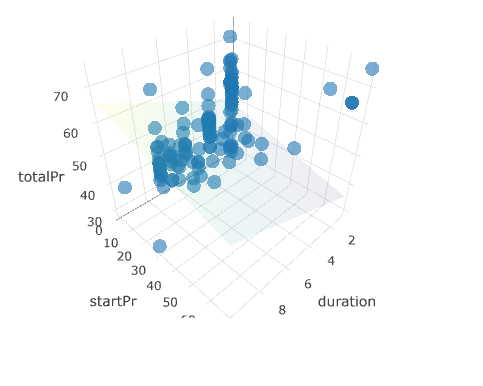

In [33]:
display_png(file="3d.png")

## Visualizing parallel planes
By including the duration, starting price, and condition variables in our model, we now have two explanatory variables and one categorical variable. Our model now takes the geometric form of two parallel planes!

The first plane corresponds to the model output when the condition of the item is new, while the second plane corresponds to the model output when the condition of the item is used. The planes have the same slopes along both the duration and starting price axes—it is the z-intercept that is different.

Once again we have stored the x and y vectors for you. Since we now have two planes, there are matrix objects plane0 and plane1 stored for you as well.

### Instructions
- Use plot_ly to draw 3D scatterplot for totalPr as a function of duration, startPr, and cond by mapping the z variable to the response and the x and y variables to the explanatory variables. Duration should be on the x-axis and starting price should be on the y-axis. Use color to represent cond.
- Use add_surface() (twice) to draw two planes through the cloud of points, one for new MarioKarts and another for used ones. Use the objects plane0 and plane1.

In [34]:
#  # draw the 3D scatterplot
#  p <- plot_ly(data = mario_kart, z = ~totalPr, x = ~duration, y = ~startPr, opacity = 0.6) %>%
#    add_markers(color = ~cond) 
#    
#  # draw two planes
#  p %>%
#    add_surface(x = ~x, y = ~y, z = ~plane0, showscale = FALSE) %>%
#    add_surface(x = ~x, y = ~y, z = ~plane1, showscale = FALSE)

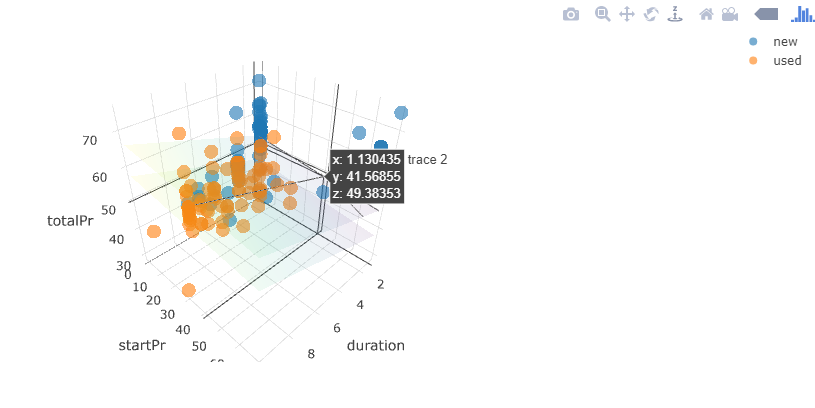

In [35]:
display_png(file="3d2.png")

# 4. Logistic Regression

In this chapter you'll learn about using logistic regression, a generalized linear model (GLM), to predict a binary outcome and classify observations.

## Fitting a line to a binary response
When our response variable is binary, a regression model has several limitations. Among the more obvious—and logically incongruous—is that the regression line extends infinitely in either direction. This means that even though our response variable y only takes on the values 0 and 1, our fitted values y^ can range anywhere from $−∞$ to $∞$. This doesn't make sense.

To see this in action, we'll fit a linear regression model to data about 55 students who applied to medical school. We want to understand how their undergraduate GPA relates to the probability they will be accepted by a particular school (Acceptance).

### Instructions
- The medical school acceptance data is loaded in your workspace as MedGPA.
- Create a scatterplot called data_space for Acceptance as a function of GPA. Use geom_jitter() to apply a small amount of jitter to the points in the y-direction by setting width = 0 and height = 0.05.
- Use geom_smooth() to add the simple linear regression line to data_space.

In [42]:
# install.packages('xlsx')
library(xlsx)

In [43]:
MedGPA <- read.xlsx(file ="df.xlsx", sheetIndex = 2, header=TRUE)

`geom_smooth()` using formula 'y ~ x'



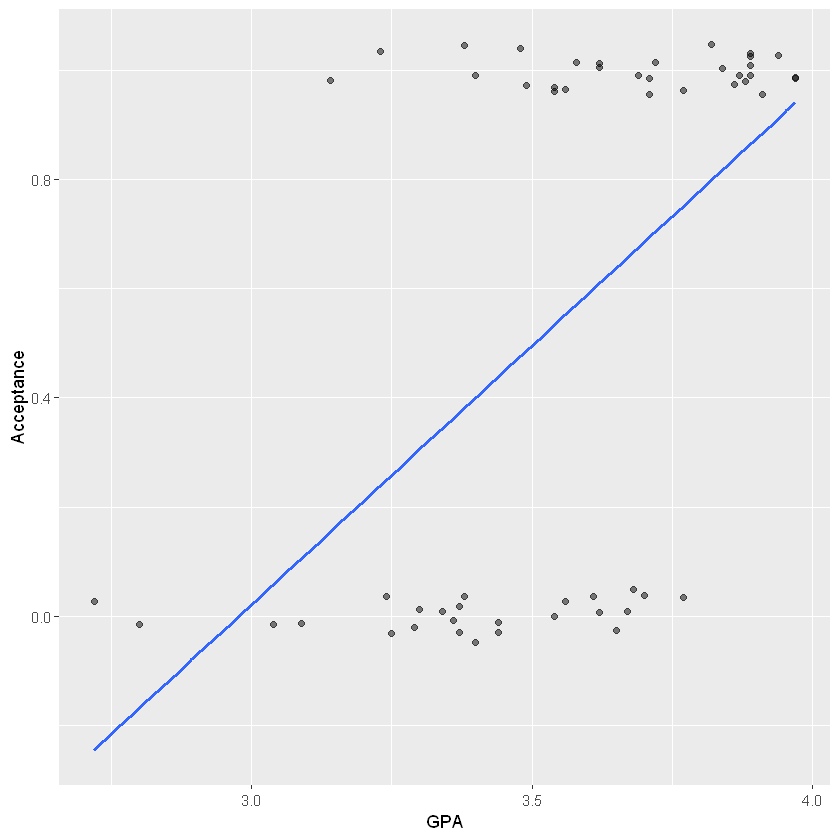

In [44]:
# scatterplot with jitter
data_space <- ggplot(data = MedGPA, aes(y = Acceptance, x = GPA)) + 
  geom_jitter(width = 0, height = 0.05, alpha = 0.5)

# linear regression line
data_space + 
  geom_smooth(method = "lm", se = FALSE)

## Fitting a line to a binary response (2)
In the previous exercise, we identified a major limitation to fitting a linear regression model when we have a binary response variable. However, it is not always inappropriate to do so. Note that our regression line only makes illogical predictions (i.e. \($\hat{y} \lt 0\) or \(\hat{y} \gt 1\$)) for students with very high or very low GPAs. For GPAs closer to average, the predictions seem fine.

Moreover, the alternative logistic regression model — which we will fit next — is very similar to the linear regression model for observations near the average of the explanatory variable. It just so happens that the logistic curve is very straight near its middle. Thus, in these cases a linear regression model may still be acceptable, even for a binary response.

### Instructions

- Use filter() to find the subset of the observations in MedGPA whose GPAs are between 3.375 and 3.77, inclusive.
- Create a scatterplot called data_space for Acceptance as a function of GPA for only those observations. 
- Use geom_jitter() to apply 0.05 jitter to the points in the \(y\)-direction and no jitter to the \(x\) direction.
- Use geom_smooth() to add only the simple linear regression line to data_space.

`geom_smooth()` using formula 'y ~ x'



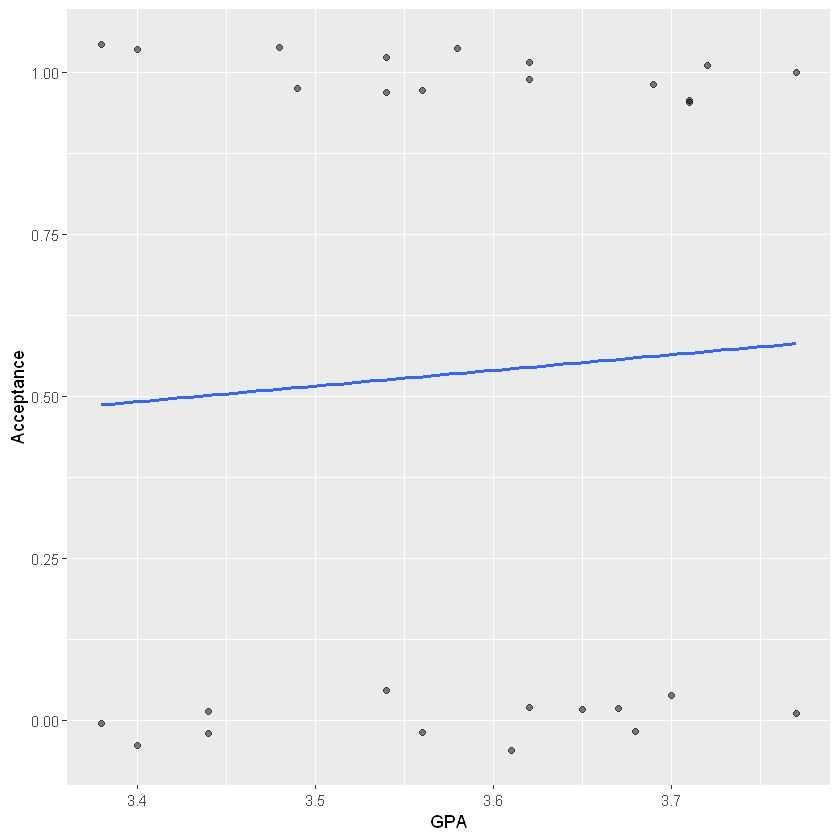

In [45]:
# filter
MedGPA_middle <- MedGPA %>%
  filter(GPA >= 3.375, GPA <= 3.770)

# scatterplot with jitter
data_space <- ggplot(data = MedGPA_middle, aes(y = Acceptance, x = GPA)) + 
  geom_jitter(width = 0, height = 0.05, alpha = 0.5)

# linear regression line
data_space + 
  geom_smooth(method = "lm", se = FALSE)

## Fitting a model
Logistic regression is a special case of a broader class of generalized linear models, often known as GLMs. Specifying a logistic regression model is very similar to specify a regression model, with two important differences:

We use the glm() function instead of lm()
We specify the family argument and set it to binomial. This tells the GLM function that we want to fit a logistic regression model to our binary response. [The terminology stems from the assumption that our binary response follows a binomial distribution.]
We still use the formula and data arguments with glm().

Note that the mathematical model is now: $$ \log{ \left( \frac{y}{1-y} \right) } = \beta_0 + \beta_1 \cdot x + \epsilon \,, $$ where \(\epsilon\) is the error term.

### Instructions
- Use glm() to fit a logistic regression model for Acceptance as a function of GPA.

In [46]:
# fit model
glm(Acceptance ~ GPA, data = MedGPA, family = binomial)


Call:  glm(formula = Acceptance ~ GPA, family = binomial, data = MedGPA)

Coefficients:
(Intercept)          GPA  
    -19.207        5.454  

Degrees of Freedom: 54 Total (i.e. Null);  53 Residual
Null Deviance:	    75.79 
Residual Deviance: 56.84 	AIC: 60.84

## Using geom_smooth()
Our logistic regression model can be visualized in the data space by overlaying the appropriate logistic curve. We can use the geom_smooth() function to do this. Recall that geom_smooth() takes a method argument that allows you to specify what type of smoother you want to see. In our case, we need to specify that we want to use the glm() function to do the smoothing.

However we also need to tell the glm() function which member of the GLM family we want to use. To do this, we will pass the family argument to glm() as a list using the method.args argument to geom_smooth(). This mechanism is common in R, and allows one function to pass a list of arguments to another function.

### Instructions

- Create a scatterplot called data_space for Acceptance as a function of GPA. Use geom_jitter() to apply a small amount of jitter to the points in the y-direction. Set width = 0 and height = 0.05 in geom_jitter().
- Use geom_smooth() to add the logistic regression line to data_space by specifying the method and method.args arguments to fit a logistic glm.

`geom_smooth()` using formula 'y ~ x'



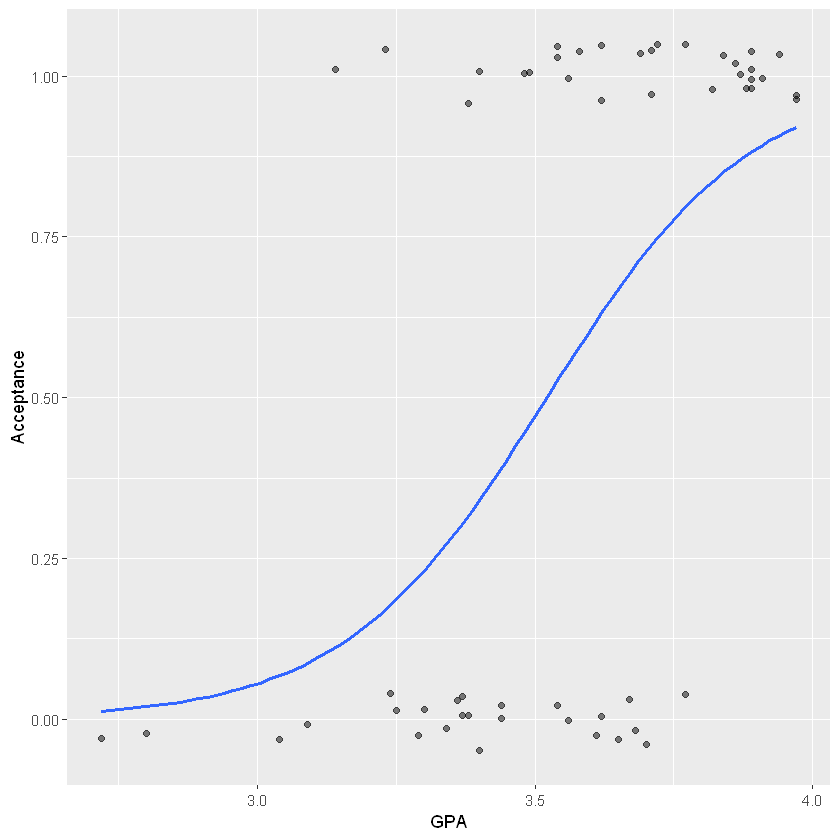

In [47]:
# scatterplot with jitter
data_space <- ggplot(data = MedGPA, aes(y = Acceptance, x = GPA)) + 
  geom_jitter(width = 0, height = 0.05, alpha = 0.5)

# add logistic curve
data_space +
  geom_smooth(method = "glm", se = FALSE, method.args = list(family = "binomial"))

## Using bins
One of the difficulties in working with a binary response variable is understanding how it "changes." The response itself (\(y\)) is either 0 or 1, while the fitted values (\(\hat{y}\))—which are interpreted as probabilities—are between 0 and 1. But if every medical school applicant is either admitted or not, what does it mean to talk about the probability of being accepted?

What we'd like is a larger sample of students, so that for each GPA value (e.g. 3.54) we had many observations (say \(n\)), and we could then take the average of those \(n\) observations to arrive at the estimated probability of acceptance. Unfortunately, since the explanatory variable is continuous, this is hopeless—it would take an infinite amount of data to make these estimates robust.

Instead, what we can do is put the observations into bins based on their GPA value. Within each bin, we can compute the proportion of accepted students, and we can visualize our model as a smooth logistic curve through those binned values.

We have created a data.frame called MedGPA_binned that aggregates the original data into separate bins for each 0.25 of GPA. It also contains the fitted values from the logistic regression model.

Here we are plotting \(y\) as a function of \(x\), where that function is $$ y = \frac{\exp{( \hat{\beta}_0 + \hat{\beta}_1 \cdot x )}}{1 + \exp( \hat{\beta}_0 + \hat{\beta}_1 \cdot x ) } \,. $$ Note that the left hand side is the expected probability \(y\) of being accepted to medical school.

### Instructions

- Create a scatterplot called data_space for acceptance_rate as a function of mean_GPA using the binned data in MedGPA_binned. Use geom_line() to connect the points.
- Augment the model mod. Create predictions on the scale of the response variable by using the type.predict argument.
- Use geom_line() to illustrate the model through the fitted values.

In [48]:
MedGPA_binned <- read.xlsx(file ="df.xlsx", sheetIndex = 3, header=TRUE)

In [49]:
MedGPA_binned

bin,mean_GPA,acceptance_rate
<fct>,<dbl>,<dbl>
"[2.72,3.3]",3.11,0.200
"(3.3,3.44]",3.39,0.200
"(3.44,3.58]",3.54,0.750
"(3.58,3.7]",3.65,0.333
"(3.7,3.87]",3.79,0.889
"(3.87,3.97]",3.91,1.000


In [50]:
#  # binned points and line
#  data_space <- ggplot(data = MedGPA_binned, aes(x = mean_GPA, y = acceptance_rate)) + 
#    geom_point() + geom_line()
#  
#  # augmented model
#  MedGPA_plus <- mod %>%
#    augment(type.predict = "response")
#  
#  # logistic model on probability scale
#  data_space +
#    geom_line(data = MedGPA_plus, aes(x = GPA, y = .fitted), color = "red")

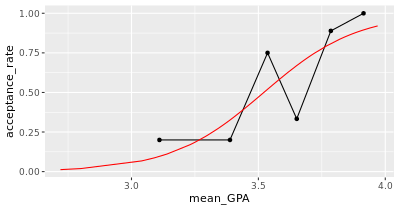

In [51]:
display_png(file="ch3.png")

## Odds scale
For most people, the idea that we could estimate the probability of being admitted to medical school based on undergraduate GPA is fairly intuitive. However, thinking about how the probability changes as a function of GPA is complicated by the non-linear logistic curve. By translating the response from the probability scale to the odds scale, we make the right hand side of our equation easier to understand.

If the probability of getting accepted is \(y\), then the odds are \($y / (1-y)\$). Expressions of probabilities in terms of odds are common in many situations, perhaps most notably gambling.

Here we are plotting \$(y/(1-y)\)$ as a function of \(x\), where that function is $$ odds(\hat{y}) = \frac{\hat{y}}{1-\hat{y}} = \exp{( \hat{\beta}_0 + \hat{\beta}_1 \cdot x ) } $$ Note that the left hand side is the expected odds of being accepted to medical school. The right hand side is now a familiar exponential function of \(x\).

The MedGPA_binned data frame contains the data for each GPA bin, while the MedGPA_plus data frame records the original observations after being augment()-ed by mod.

### Instructions

- Add a variable called odds to MedGPA_binned that records the odds of being accepted to medical school for each bin.
- Create a scatterplot called data_space for odds as a function of mean_GPA using the binned data in MedGPA_binned. Connect the points with geom_line().
- Add a variable called odds_hat to MedGPA_plus that records the predicted odds of being accepted for each observation.
- Use geom_line() to illustrate the model through the fitted values. Note that you should be plotting the \(\widehat{odds}\)'s.

In [53]:
MedGPA_plus <- read.xlsx(file ="df.xlsx", sheetIndex = 4, header=TRUE)

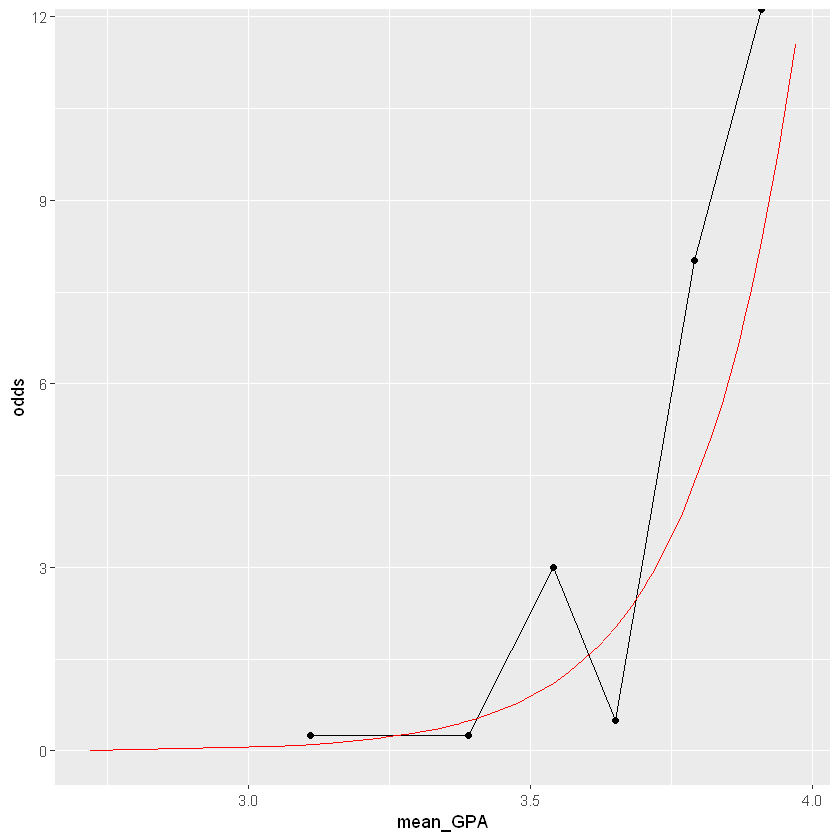

In [54]:
# compute odds for bins
MedGPA_binned <- MedGPA_binned %>%
  mutate(odds = acceptance_rate / (1 - acceptance_rate))

# plot binned odds
data_space <- ggplot(data = MedGPA_binned, aes(x = mean_GPA, y = odds)) + 
  geom_point() + geom_line()

# compute odds for observations
MedGPA_plus <- MedGPA_plus %>%
  mutate(odds_hat = .fitted / (1 - .fitted))

# logistic model on odds scale
data_space +
  geom_line(data = MedGPA_plus, aes(x = GPA, y = odds_hat), color = "red")

## Log-odds scale
Previously, we considered two formulations of logistic regression models:

on the probability scale, the units are easy to interpret, but the function is non-linear, which makes it hard to understand
on the odds scale, the units are harder (but not impossible) to interpret, and the function in exponential, which makes it harder (but not impossible) to interpret
We'll now add a third formulation:

on the log-odds scale, the units are nearly impossible to interpret, but the function is linear, which makes it easy to understand
As you can see, none of these three is uniformly superior. Most people tend to interpret the fitted values on the probability scale and the function on the log-odds scale. The interpretation of the coefficients is most commonly done on the odds scale. Recall that we interpreted our slope coefficient \(\beta_1\) in linear regression as the expected change in \(y\) given a one unit change in \(x\). On the probability scale, the function is non-linear and so this approach won't work. On the log-odds, the function is linear, but the units are not interpretable (what does the \(\log\) of the odds mean??). However, on the odds scale, a one unit change in \(x\) leads to the odds being multiplied by a factor of \(\beta_1\). To see why, we form the odds ratio:

$$ OR = \frac{odds(\hat{y} | x + 1 )}{ odds(\hat{y} | x )} = \exp{\beta_1} $$

Thus, the exponentiated coefficent \(\beta_1\) tells us how the expected odds change for a one unit increase in the explanatory variable. It is tempting to interpret this as a change in the expected probability, but this is wrong and can lead to nonsensical predictions (e.g. expected probabilities greater than 1).

### Instructions

- Add a variable called log_odds to MedGPA_binned that records the odds of being accepted for each bin. Recall that $\(odds(p) = p / (1-p)\)$.
- Create a scatterplot called data_space for log_odds as a function of mean_GPA using the binned data in MedGPA_binned. Use geom_line to connect the points.
- Add a variable called log_odds_hat to MedGPA_plus that records the predicted odds of being accepted for each observation.
- Use geom_line() to illustrate the model through the fitted values. Note that you should be plotting the \$(\log{\widehat{odds}}\)$'s.

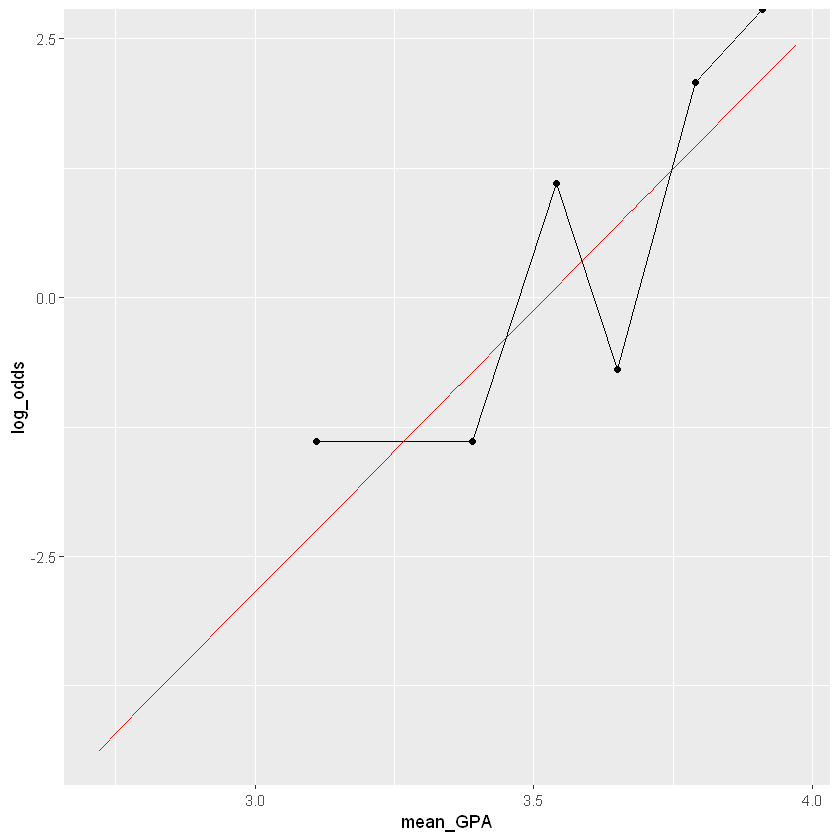

In [55]:
# compute log odds for bins
MedGPA_binned <- MedGPA_binned %>%
  mutate(log_odds = log(acceptance_rate / (1 - acceptance_rate)))

# plot binned log odds
data_space <- ggplot(data = MedGPA_binned, aes(x = mean_GPA, y = log_odds)) + 
  geom_point() + geom_line()

# compute log odds for observations
MedGPA_plus <- MedGPA_plus %>%
  mutate(log_odds_hat = log(.fitted / (1 - .fitted)))

# logistic model on log odds scale
data_space +
  geom_line(data = MedGPA_plus, aes(x = GPA, y = log_odds_hat), color = "red")

## Making probabilistic predictions
Just as we did with linear regression, we can use our logistic regression model to make predictions about new observations. In this exercise, we will use the newdata argument to the augment() function from the broom package to make predictions about students who were not in our original data set. These predictions are sometimes called out-of-sample.

Following our previous discussion about scales, with logistic regression it is important that we specify on which scale we want the predicted values. Although the default is terms -- which uses the log-odds scale -- we want our predictions on the probability scale, which is the scale of the response variable. The type.predict argument to augment() controls this behavior.

A logistic regression model object, mod, has been defined for you.

### Instructions

- Create a new data frame which has one variable called GPA and one row, with the value 3.51.
- Use augment() to find the expected probability of admission to medical school for a student with a GPA of 3.51.

In [63]:
mod <- glm(formula = Acceptance ~ GPA, family = binomial, data = MedGPA)

In [64]:
# create new data frame
new_data <- data.frame(GPA = 3.51)

# make predictions
augment(mod, newdata = new_data, type.predict = "response")

GPA,.fitted
<dbl>,<dbl>
3.51,0.4844099


## Making binary predictions
Naturally, we want to know how well our model works. Did it predict acceptance for the students who were actually accepted to medical school? Did it predict rejections for the student who were not admitted? These types of predictions are called in-sample. One common way to evaluate models with a binary response is with a confusion matrix. [Yes, that is actually what it is called!]

However, note that while our response variable is binary, our fitted values are probabilities. Thus, we have to round them somehow into binary predictions. While the probabilities convey more information, we might ultimately have to make a decision, and so this rounding is common in practice. There are many different ways to round, but for simplicity we will predict admission if the fitted probability is greater than 0.5, and rejection otherwise.

First, we'll use augment() to make the predictions, and then mutate() and round() to convert these probabilities into binary decisions. Then we will form the confusion matrix using the table() function. table() will compute a 2-way table when given a data frame with two categorical variables, so we will first use select() to grab only those variables.

You will find that this model made only 15 mistakes on these 55 observations, so it is nearly 73% accurate.

### Instructions

- The model object mod is already in your worskpace.
- Create a data frame with the actual observations, and their fitted probabilities, and add a new column, Acceptance_hat, with the binary decision by rounding the fitted probabilities.
- Compute the confusion matrix between the actual and predicted acceptance.

In [65]:
# data frame with binary predictions
tidy_mod <- augment(mod, type.predict = "response") %>% 
  mutate(Acceptance_hat = round(.fitted)) 
  
# confusion matrix
tidy_mod %>% 
  select(Acceptance, Acceptance_hat) %>%
  table()

          Acceptance_hat
Acceptance  0  1
         0 16  9
         1  6 24

# 5. Case Study: Italian restaurants in NYC

Explore the relationship between price and the quality of food, service, and decor for Italian restaurants in NYC.

# SLR models
Based on your knowledge of the restaurant industry, do you think that the quality of the food in a restaurant is an important determinant of the price of a meal at that restaurant? It would be hard to imagine that it wasn't. We'll start our modeling process by plotting and fitting a model for Price as a function of Food.

On your own, interpret these coefficients and examine the fit of the model. What does the coefficient of Food mean in plain English? "Each additional rating point of food quality is associated with a..."

### Instructions

Use ggplot to make a scatter plot for Price as a function of Food.
Use lm() to fit a simple linear regression model for Price as a function of Food.

In [71]:
# install.packages("data.table")
library(data.table)

In [77]:
url <- "https://assets.datacamp.com/production/repositories/845/datasets/639a7a3f9020edb51bcbc4bfdb7b71cbd8b9a70e/nyc.csv"
nyc <- fread(url)


Call:
lm(formula = Price ~ Food, data = nyc)

Coefficients:
(Intercept)         Food  
    -17.832        2.939  


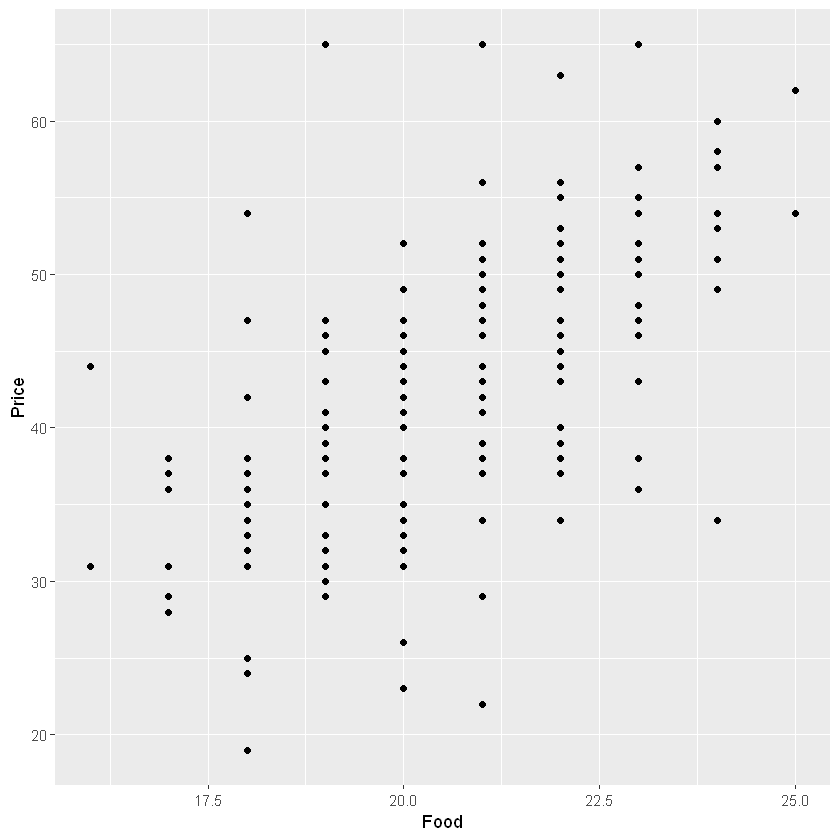

In [78]:
# Price by Food plot
ggplot(data = nyc, aes(x = Food, y = Price)) +
  geom_point()

# Price by Food model
lm(Price ~ Food, data = nyc)

# A plane in 3D
One reason that many people go to a restaurant—apart from the food—is that they don't have to cook or clean up. Many people appreciate the experience of being waited upon, and we can all agree that the quality of the service at restaurants varies widely. Are people willing to pay more for better restaurant Service? More interestingly, are they willing to pay more for better service, after controlling for the quality of the food?

Multiple regression gives us a way to reason about these questions. Fit the model with Food and Service and interpret the coefficients and fit. Did the coefficient on Food change from the previous model? What do the coefficients on Food and Service tell you about how these restaurants set prices?

Next, let's visually assess our model using plotly. The x and y vectors, as well as the plane matrix, have been created for you.

### Instructions

- Use lm() to fit a multiple regression model for Price as a function of Food and Service.
- Use plot_ly to draw 3D scatterplot for Price as a function of Food and Service by mapping the z variable to the response and the x and y variables to the explanatory variables. 
- Place the food quality on the x-axis and service rating on the y-axis.
- Use add_surface() to draw a plane through the cloud of points using the object plane.


In [83]:
#install.packages('plotly')
library(plotly)

In [85]:
# fit model
lm(Price ~ Food + Service, data = nyc)

#  # draw 3D scatterplot
#  p <- plot_ly(data = nyc, z = ~Price, x = ~Food, y = ~Service, opacity = 0.6) %>%
#    add_markers() 
#  
#  # draw a plane
#  p %>%
#    add_surface(x = ~x, y = ~y, z = ~plane, showscale = FALSE) 


Call:
lm(formula = Price ~ Food + Service, data = nyc)

Coefficients:
(Intercept)         Food      Service  
    -21.159        1.495        1.704  


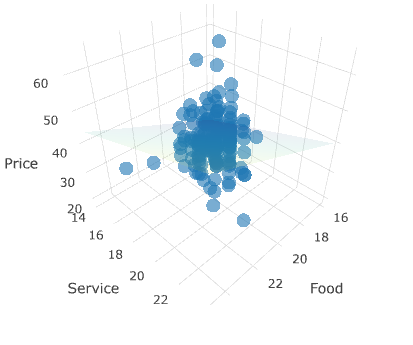

In [86]:
display_png(file="ch5.png")

# Parallel planes with location
We have explored models that included the quality of both food and service, as well as location, but we haven't put these variables all into the same model. Let's now build a parallel planes model that incorporates all three variables.

Examine the coefficients closely. Do they make sense based on what you understand about these data so far? How did the coefficients change from the previous models that you fit?

### Instructions
- Use lm() to fit a parallel planes model for Price as a function of Food, Service, and East.


In [87]:
# Price by Food and Service and East
lm(Price ~ Food + Service + East, data = nyc)


Call:
lm(formula = Price ~ Food + Service + East, data = nyc)

Coefficients:
(Intercept)         Food      Service         East  
   -20.8155       1.4863       1.6647       0.9649  


# Impact of location
The impact of location brings us to a modeling question: should we keep this variable in our model? In a later course, you will learn how we can conduct formal hypothesis tests to help us answer that question. In this course, we will focus on the size of the effect. Is the impact of location big or small?

One way to think about this would be in terms of the practical significance. Is the value of the coefficient large enough to make a difference to your average person? The units are in dollars so in this case this question is not hard to grasp.

Another way is to examine the impact of location in the context of the variability of the other variables. We can do this by building our parallel planes in 3D and seeing how far apart they are. Are the planes close together or far apart? Does the East variable clearly separate the data into two distinct groups? Or are the points all mixed up together?

### Instructions

- Use plot_ly to draw 3D scatterplot for Price as a function of Food, Service, and East by mapping the z variable to the response and the x and y variables to the numeric explanatory variables. Use color to indicate the value of East. Place Food on the x-axis and Service on the y-axis.
- Use add_surface() (twice) to draw two planes through the cloud of points, one for restaurants on the West side and another for restaurants on the East side. Use the objects plane0 and plane1.

In [88]:
#  # draw 3D scatterplot
#  p <- plot_ly(data = nyc, z = ~Price, x = ~Food, y = ~Service, opacity = 0.6) %>%
#    add_markers(color = ~factor(East)) 
#  
#  # draw two planes
#  p %>%
#    add_surface(x = ~x, y = ~y, z = ~plane0, showscale = FALSE) %>%
#    add_surface(x = ~x, y = ~y, z = ~plane1, showscale = FALSE)

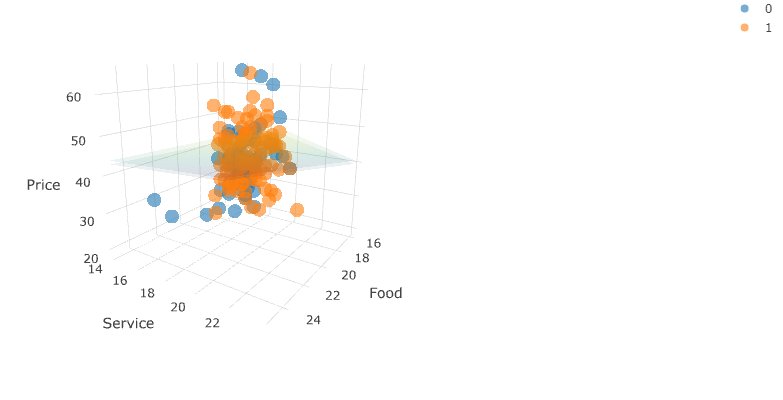

In [89]:
display_png(file="ch5.2.png")

# END OF THIS EXCELLENTE COURSE

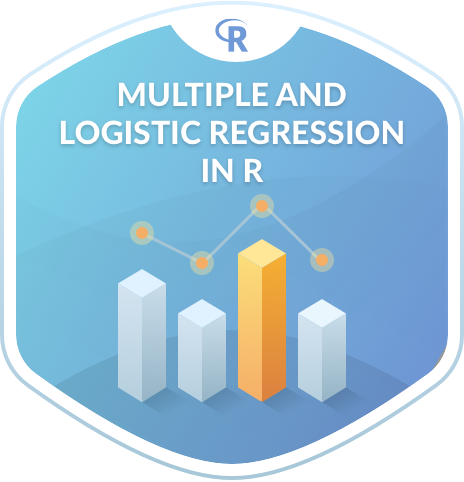

In [90]:
display_png(file="mlr.png")